## Nurullainy binti Mat Rashid
## Project Title: Crude Oil Price Prediction
### Milestone 4: Data Interpretation & Communication of Insights of data  

### Building Recurrent Neural Network (RNN)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
import pickle

Using TensorFlow backend.


Make sure to install Keras deep learning library and other dependencies on your system

Keras is designed to enable fast experimentation with deep neural networks, it focuses on being user-friendly and extensible. Futhermore, it is easy to develop deep learning models regardless of the computational backend such as Tensorflow, Microsoft Cognitive Toolkit or R

### Data Preparation

In [2]:
# Load dataset
df_train = pd.read_csv('/Volumes/Lainy 1T WD/WQD7005 Data Mining /Assignment /M4 - Data Intrepetation/Crude Oil Data/oilprice_trend_train.csv')

# This will be input into the scaler
training_set = df_train[['Close_Price']]

In [3]:
# Feature Scaling
# Recommended to use normalization (min and max) instead of standardisation (mean and std) in LSTM (Keras) 

sc = MinMaxScaler(feature_range=(0,1))
training_set_scaled = sc.fit_transform(training_set)

Specify a data structure to tell LSTM the number of timestep and other parameters to remember in RNN

Wrong number or inaccuracy of parameters could lead to overfitting or irrelevant predictions

I will create a data structure with 60 timesteps and 1 output. Meaning 60 timestep per sequence

60 timesteps means the RNN will refer to the previous 60 timestep to predict an output

In our case, our timestep is in days. RNN will look at the historical 60 days data from the current day

By experiment, 60 turns out to be the best choice for timesteps in time series analysis (Experiment: 10,20,20..60)

1 month have roughly 20 financial day, thus 60 days = 3 previous month

In [4]:
X_train = [] # X-train, the input to RNN that contain the crude oil price of previous 60 previous timestep
y_train = [] # y_train, contain the crude oil price of the the current time step (60th) 

for i in range(2,1457): # Start prediction at the 60th days as our timestep is 60 till the final data
    X_train.append(training_set_scaled[i-2:i,0]) # Data from day 0-59 will be used to predict price at day 60
    y_train.append(training_set_scaled[i,0])
X_train, y_train = np.array(X_train), np.array(y_train)

Reshaping / data transformation to fulfill the input shape require by Keras and add dimension to the x_train

Add other features/ indicator beside the 'Close Price' column

In [5]:
#  Batch size, time step, number of indicator in our case = 1

X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

### Building Recurrent Neural Network (RNN) using LSTM Layer

Long Short Term (LSTM) is one of type of networks in RNN that uses special additional units to the standard units in Keras module (CNN). 

During the training of RNN, as the information goes in loop again and again resulting in very large updates to neural network model weights. Hence, LSTM was designed to solve this problem of unstable neural network.

LSTM units include a 'memory cell' that can maintain information in memory for long periods of time. A set of gates is used to control when information enters the memory, when it's output, and when it's forgotten. This architecture lets them learn longer-term dependencies and work best for this dataset.

In [6]:
# Initialize
# We set the variable as 'regressor' because the result of the prediction is a continuous value

regressor = Sequential() # Sequential() best for time series data

units = number of neurons in LSTM layers (too small units will not be able to capture the previous trend)

return_sequence = True if using stacked RNN. For the last layer of RNN, return_sequence = False

input shape = batch size or number of data is automatically taken into account. Eg: number of time step, number of indicator

In [7]:
# Adding 1st RNN layer

regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1],1)))
regressor.add(Dropout(rate=0.2))

Dropout = is a regularization technique for reducing overfitting in neural networks by preventing complex co-adaptations on training data. It is an efficient way of performing model averaging with neural networks. Float between 0 and 1. Fraction of the units to drop for the linear transformation of the inputs. This value is the percentage of the considered network connections per epoch/batch. Default: 0. We use = 0.2

Optimizer = stochastic gradient descent method that computes individual adaptive learning rates for different parameters from estimates of first- and second-order moments of the gradients. Use Adam algorithm

In [8]:
# Adding 2nd LSTM layer
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(rate=0.2))

# Adding 3rd LSTM layer
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(rate=0.2))

# Adding 4th LSTM layer
regressor.add(LSTM(units = 50))
regressor.add(Dropout(rate=0.2))

# Add output layer
regressor.add(Dense(units=1))

# Compile
regressor.compile(optimizer='adam',loss='mean_squared_error') # Outliers concerned over residuals

batch_size = number of samples to work through before updating the internal model parameters.

epochs = number times that the learning algorithm will work through the entire training dataset

In [22]:
# Fit the RNN to training data

regressor.fit(X_train,y_train,batch_size=35,epochs=70)

Epoch 1/70
1455/1455 [==============================] - 0s 238us/step - loss: 0.0024
Epoch 2/70
1455/1455 [==============================] - 0s 212us/step - loss: 0.0024
Epoch 3/70
1455/1455 [==============================] - 0s 215us/step - loss: 0.0024
Epoch 4/70
1455/1455 [==============================] - 0s 212us/step - loss: 0.0024
Epoch 5/70
1455/1455 [==============================] - 0s 212us/step - loss: 0.0023
Epoch 6/70
1455/1455 [==============================] - 0s 213us/step - loss: 0.0024
Epoch 7/70
1455/1455 [==============================] - 0s 201us/step - loss: 0.0023
Epoch 8/70
1455/1455 [==============================] - 0s 210us/step - loss: 0.0025
Epoch 9/70
1455/1455 [==============================] - 0s 217us/step - loss: 0.0023
Epoch 10/70
1455/1455 [==============================] - 0s 218us/step - loss: 0.0024
Epoch 11/70
1455/1455 [==============================] - 0s 206us/step - loss: 0.0023
Epoch 12/70
1455/1455 [==============================] - 0s 207

### Crude Oil Price Prediction

In [23]:
# Load Test Set
df_test = pd.read_csv('/Volumes/Lainy 1T WD/WQD7005 Data Mining /Assignment /M4 - Data Intrepetation/Crude Oil Data/oilprice_trend_test.csv')
actual_oil_price = df_test[['Close_Price']]

# Concatenate the training set and test set
df_total = pd.concat((df_train['Close_Price'],df_test['Close_Price']),axis=0)
inputs = df_total[(len(df_total) - len(df_test) - 60):].values
inputs = inputs.reshape(-1,1)
inputs_scaled = sc.transform(inputs)

X_test = [] 
y_test = []

for i in range(2,367):
    X_test.append(inputs_scaled[i-2:i,0])
    y_test.append(inputs_scaled[i,0])
X_test= np.array(X_test)
X_test = np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))

predicted_oil_price = regressor.predict(X_test)
predicted_oil_price = sc.inverse_transform(predicted_oil_price)

In [24]:
regressor.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 2, 50)             10400     
_________________________________________________________________
dropout_1 (Dropout)          (None, 2, 50)             0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 2, 50)             20200     
_________________________________________________________________
dropout_2 (Dropout)          (None, 2, 50)             0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 2, 50)             20200     
_________________________________________________________________
dropout_3 (Dropout)          (None, 2, 50)             0         
_________________________________________________________________
lstm_4 (LSTM)                (None, 50)               

### Actual vs Prediction Data Visualization

Text(0, 0.5, 'Oil Price')

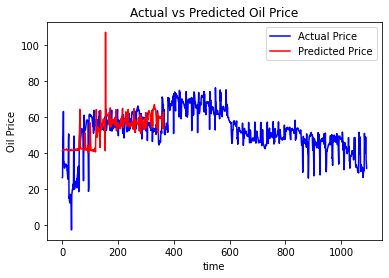

In [27]:
plt.plot(actual_oil_price, color='blue', label='Actual Price')
plt.plot(predicted_oil_price, color='red', label='Predicted Price')
plt.legend()
plt.title('Actual vs Predicted Oil Price')
plt.xlabel('time')
plt.ylabel('Oil Price')

### Evaluate the model using Error Metrics

In [28]:
# Define a function for MAPE as there is no built-in function in Keras module

def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100


print('MAE:', metrics.mean_absolute_error(actual_oil_price[:365], predicted_oil_price))
print('MAPE:', mean_absolute_percentage_error(actual_oil_price[:365], predicted_oil_price)) 
print('MSE:', metrics.mean_squared_error(actual_oil_price[:365], predicted_oil_price))
print('RMSE:', np.sqrt(metrics.mean_squared_error(actual_oil_price[:365], predicted_oil_price)))
print('R2:', metrics.r2_score(actual_oil_price[:365], predicted_oil_price)) 

MAE: 8.389948528185199
MAPE: 28.06170923522378
MSE: 124.91020176276663
RMSE: 11.17632326674415
R2: 0.24662281630061156


In [36]:
# Export to pickle file

pickle.dump(regressor, open('RNNmodel.pkl','wb'))